In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)
library(lfe)
library(ggsci)
library(lubridate)
library(ggplot2)
library(doMC)
library(gridExtra)
library(ggpubr)
library(stargazer)
registerDoMC(4)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [2]:
fp <- '/pool001/mfzhao/'
df <- read_rds(str_c(fp, '/PROCESSED_DATA/panel_pre_xgr.RDS'))

In [3]:
df %>%
    mutate(as_newcases  = asinh(newcases),
           as_newdeaths = asinh(newdeaths),
           as_stnewcases  = asinh(stnewcases),
           as_stnewdeaths = asinh(stnewdeaths),
           ct_unemp_rate = as.numeric(ct_unemp_rate),
           st_unemp_rate = as.numeric(st_unemp_rate)) %>%
    select(key,
           date, 
           cluster,
           n,
           log_mcbgv,
           log_pnchd,
           log_pgt1hafh, 
           log_ppthlt75,
           log_pgt2kmt,
           matches('unemp'),
           matches('^log_stalter_'), 
           matches('^[pt][rm][ca][px][01][0-9]$'),
           matches('^p[123]...$'),
           matches('stalter_p[123]...$'),
           matches('stalter[NF]'),
           matches('stalter_[pt][rm][ca][px][01][0-9]$'),
           matches('as_(st)?new')) -> df

In [5]:
df %>%
    group_by(key) %>%
    arrange(key, date) %>%
    mutate_at(vars(p1sdp, p2shp, p3rop, matches('stalter_p[123]...$')),
              .funs = list(l01 = function(x) lag(x) - lag(x, 2),
                           l02 = function(x) lag(x, 2) - lag(x, 3),
                           l03 = function(x) lag(x, 3) - lag(x, 4),
                           l04 = function(x) lag(x, 4) - lag(x, 5),
                           l05 = function(x) lag(x, 5) - lag(x, 6),
                           l06 = function(x) lag(x, 6) - lag(x, 7),
                           l07 = function(x) lag(x, 7) - lag(x, 8),
                           l08 = function(x) lag(x, 8) - lag(x, 9),
                           l09 = function(x) lag(x, 9) - lag(x, 10),
                           l10 = function(x) lag(x, 10) - lag(x, 11),
                           l11 = function(x) lag(x, 11) - lag(x, 12),
                           l12 = function(x) lag(x, 12) - lag(x, 13),
                           l13 = function(x) lag(x, 13) - lag(x, 14),
                           l14 = function(x) lag(x, 14),
                           m01 = function(x) lead(x) - x,
                           m02 = function(x) lead(x, 2) - lead(x, 1),
                           m03 = function(x) lead(x, 3) - lead(x, 2),
                           m04 = function(x) lead(x, 4) - lead(x, 3),
                           m05 = function(x) lead(x, 5) - lead(x, 4),
                           m06 = function(x) lead(x, 6) - lead(x, 5),
                           m07 = function(x) lead(x, 7) - lead(x, 6),
                           m08 = function(x) lead(x, 8) - lead(x, 7),
                           m09 = function(x) lead(x, 9) - lead(x, 8),
                           m10 = function(x) lead(x, 10) - lead(x, 9),
                           m11 = function(x) lead(x, 11) - lead(x, 10),
                           m12 = function(x) lead(x, 12) - lead(x, 11),
                           m13 = function(x) lead(x, 13) - lead(x, 12),
                           m14 = function(x) lead(x, 14))) %>%
    mutate_at(vars(p1sdp, p2shp, p3rop, matches('stalter_p[123]...$')), ~(. - lag(.))) -> df
                           
df %>%
    fill(matches('p[123]...$'), .direction = 'up') %>%
    fill(matches("m[012][0-9]"), .direction = 'down') %>%
    fill(matches("l[012][0-9]"), .direction = 'up') -> df

In [6]:
cns <- colnames(df)
cns

[1] "key"                  "date"                 "cluster"             
  [4] "n"                    "log_mcbgv"            "log_pnchd"           
  [7] "log_pgt1hafh"         "log_ppthlt75"         "log_pgt2kmt"         
 [10] "ct_unemp_rate"        "st_unemp_rate"        "log_stalter_mcbgv"   
 [13] "log_stalter_pnchd"    "log_stalter_pgt1hafh" "log_stalter_ppthlt75"
 [16] "log_stalter_pgt2kmt"  "prcp01"               "prcp02"              
 [19] "prcp03"               "prcp04"               "prcp05"              
 [22] "prcp06"               "prcp07"               "prcp08"              
 [25] "prcp09"               "prcp10"               "tmax02"              
 [28] "tmax03"               "tmax04"               "tmax05"              
 [31] "tmax06"               "tmax07"               "tmax08"              
 [34] "tmax09"               "tmax10"               "p1sdp"               
 [37] "p2shp"                "p3rop"                "stalter_p1sdp"       
 [40] "stalter_p2shp"        "stalter_p3rop"        "stalterNear_p1sdp"   
 [43] "stalterNear_p2shp"    "stalterNear_p3rop"    "stalterFar_p1sdp"    
 [46] "stalterFar_p2shp"     "stalterFar_p3rop"     "stalter_prcp01"      
 [49] "stalter_prcp02"       "stalter_prcp03"       "stalter_prcp04"      
 [52] "stalter_prcp05"       "stalter_prcp06"       "stalter_prcp07"      
 [55] "stalter_prcp08"       "stalter_prcp09"       "stalter_prcp10"      
 [58] "stalter_tmax02"       "stalter_tmax03"       "stalter_tmax04"      
 [61] "stalter_tmax05"       "stalter_tmax06"       "stalter_tmax07"      
 [64] "stalter_tmax08"       "stalter_tmax09"       "stalter_tmax10"      
 [67] "as_newcases"          "as_newdeaths"         "as_stnewcases"       
 [70] "as_stnewdeaths"       "p1sdp_l01"            "p2shp_l01"           
 [73] "p3rop_l01"            "stalter_p1sdp_l01"    "stalter_p2shp_l01"   
 [76] "stalter_p3rop_l01"    "p1sdp_l02"            "p2shp_l02"           
 [79] "p3rop_l02"            "stalter_p1sdp_l02"    "stalter_p2shp_l02"   
 [82] "stalter_p3rop_l02"    "p1sdp_l03"            "p2shp_l03"           
 [85] "p3rop_l03"            "stalter_p1sdp_l03"    "stalter_p2shp_l03"   
 [88] "stalter_p3rop_l03"    "p1sdp_l04"            "p2shp_l04"           
 [91] "p3rop_l04"            "stalter_p1sdp_l04"    "stalter_p2shp_l04"   
 [94] "stalter_p3rop_l04"    "p1sdp_l05"            "p2shp_l05"           
 [97] "p3rop_l05"            "stalter_p1sdp_l05"    "stalter_p2shp_l05"   
[100] "stalter_p3rop_l05"    "p1sdp_l06"            "p2shp_l06"           
[103] "p3rop_l06"            "stalter_p1sdp_l06"    "stalter_p2shp_l06"   
[106] "stalter_p3rop_l06"    "p1sdp_l07"            "p2shp_l07"           
[109] "p3rop_l07"            "stalter_p1sdp_l07"    "stalter_p2shp_l07"   
[112] "stalter_p3rop_l07"    "p1sdp_l08"            "p2shp_l08"           
[115] "p3rop_l08"            "stalter_p1sdp_l08"    "stalter_p2shp_l08"   
[118] "stalter_p3rop_l08"    "p1sdp_l09"            "p2shp_l09"           
[121] "p3rop_l09"            "stalter_p1sdp_l09"    "stalter_p2shp_l09"   
[124] "stalter_p3rop_l09"    "p1sdp_l10"            "p2shp_l10"           
[127] "p3rop_l10"            "stalter_p1sdp_l10"    "stalter_p2shp_l10"   
[130] "stalter_p3rop_l10"    "p1sdp_l11"            "p2shp_l11"           
[133] "p3rop_l11"            "stalter_p1sdp_l11"    "stalter_p2shp_l11"   
[136] "stalter_p3rop_l11"    "p1sdp_l12"            "p2shp_l12"           
[139] "p3rop_l12"            "stalter_p1sdp_l12"    "stalter_p2shp_l12"   
[142] "stalter_p3rop_l12"    "p1sdp_l13"            "p2shp_l13"           
[145] "p3rop_l13"            "stalter_p1sdp_l13"    "stalter_p2shp_l13"   
[148] "stalter_p3rop_l13"    "p1sdp_l14"            "p2shp_l14"           
[151] "p3rop_l14"            "stalter_p1sdp_l14"    "stalter_p2shp_l14"   
[154] "stalter_p3rop_l14"    "p1sdp_m01"            "p2shp_m01"           
[157] "p3rop_m01"            "stalter_p1sdp_m01"    "stalter_p2shp_m01"   
[160] "stalter_p3rop_m01"  

In [7]:
wctrls  <- str_c(cns[str_detect(cns, '[pt][rm][ca][px]..')], collapse = ' + ')
cdctrls <- str_c(cns[str_detect(cns, '[acs][st]_')], collapse = ' + ')
ctrls   <- str_c(wctrls, ' + ', cdctrls)

In [8]:
lnl   <- str_c(cns[str_detect(cns, '^p[123]..._[ml][012][0-9]')], collapse = ' + ')
wctrls  <- str_c(cns[str_detect(cns, '[pt][rm][ca][px]..')], collapse = ' + ')
cdctrls <- str_c(cns[str_detect(cns, '[acs][st]_')], collapse = ' + ')
ctrls   <- str_c(wctrls, ' + ', cdctrls)

f1    <- str_c(' p1sdp + p2shp + p3rop + ', lnl, ' + ', ctrls)  
f2    <- str_c(' p1sdp + p2shp + p3rop + stalter_p1sdp + stalter_p2shp + stalter_p3rop + ', lnl, ' + ', ctrls)

In [9]:
ldvs <- c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd')

In [10]:
get_coefs <- function(dv, vars, ivmod = F, ...) {
    lhs <- str_c(dv, ' ~ ')
    rhs <- str_c(vars, '| key + date | ')

    if(ivmod == T) {
        alter_weather <- str_c(cns[str_detect(cns, '^stalter_[pt][rm][ca][px][01][0-9]\\.r$')], collapse = ' + ')
        iv <- ifelse(str_detect(dv, 'log'), str_replace(dv, 'log', 'log_stalter'), str_c('alter_', dv))
        ivf <- str_c('(', iv, ' ~ ', alter_weather, ') | cluster')
        rhs <- str_c(rhs, ivf)
    } else {
        rhs <- str_c(rhs, '0 | cluster')
    }
    form <- as.formula(str_c(lhs, rhs))
    model <- felm(form, df, weights = df$n, ...)
    
    as.data.frame(summary(model)$coef) %>%
        mutate(var   = rownames(.),
               dv    = dv,
               model = ifelse(vars == f1, 'base', 'ap'),
               model = ifelse(ivmod, str_c(model, ' + iv'), model)) %>%
        filter(!str_detect(var, '[pPtT][rRmM][cCaA][pPxX]')) %>%
        filter(!str_detect(var, '^[acs][st]_')) %>%
        select(7, 6, 5, 1, 2, 3, 4) -> out
    
    colnames(out) <- c('model', 'dv', 'var', 'estimate', 'se', 't', 'p-val')
    return(out)
}

In [11]:
foreach(dv = ldvs, .combine = rbind) %dopar% 
    get_coefs(dv, f2, ivmod = F) -> coefs

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 12 rows [1, 2, 3, 88, 89, 90, 175, 176, 177, 262, 263, 264].”


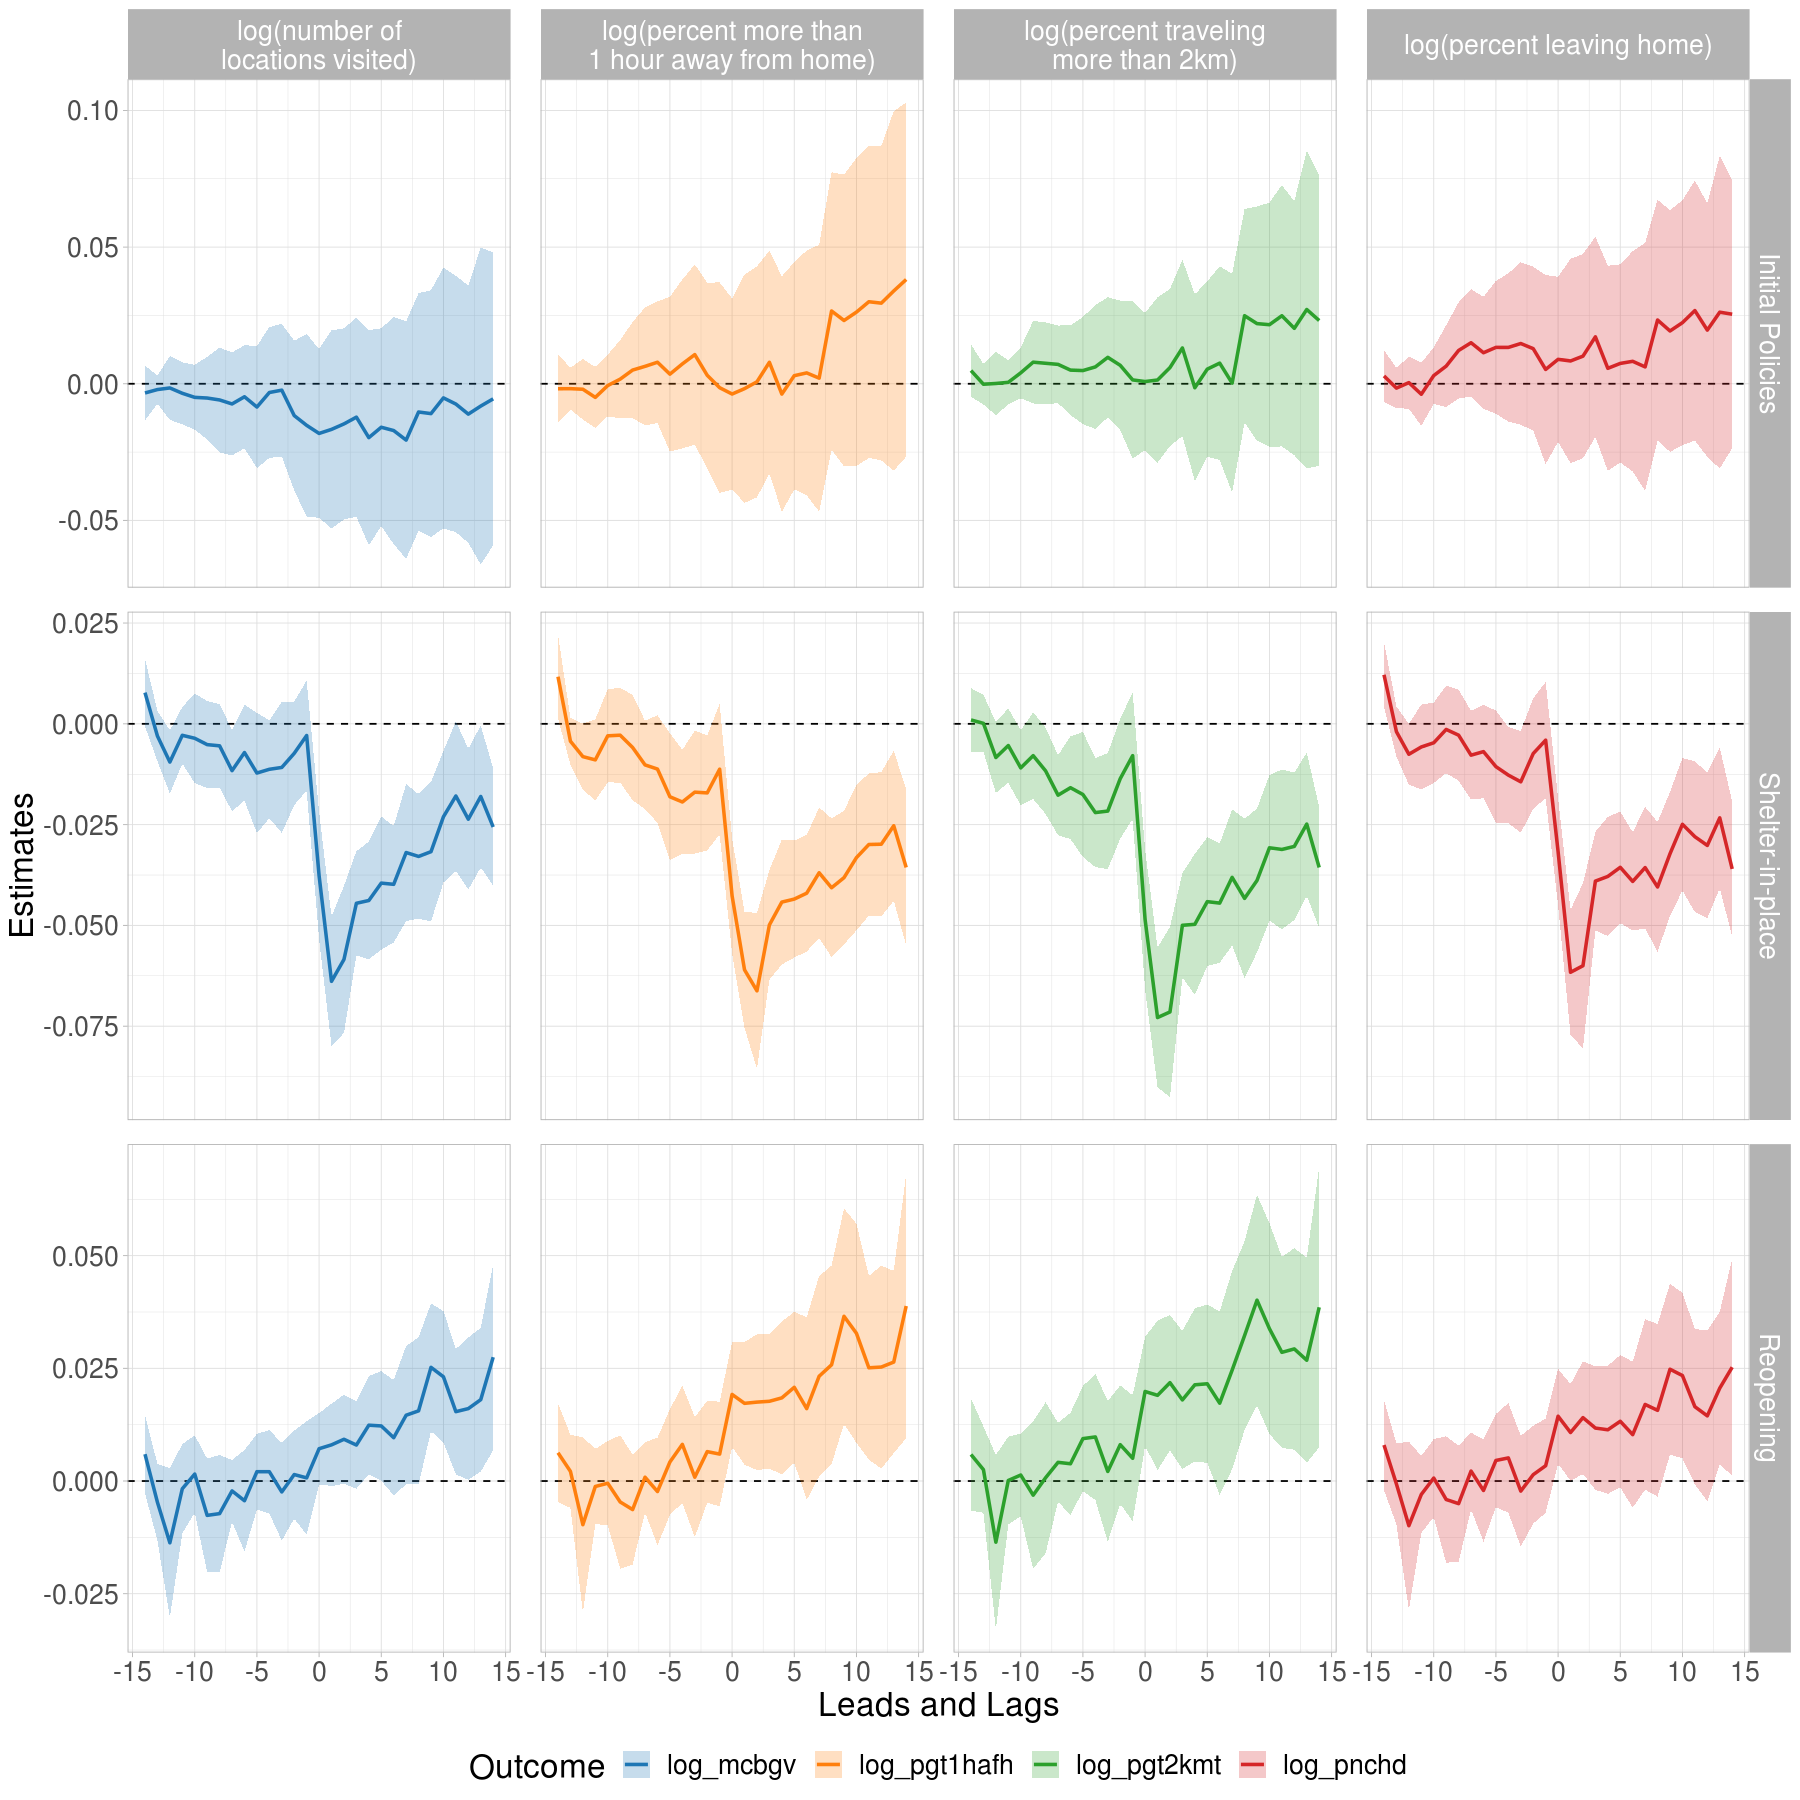

In [12]:
options(repr.plot.width=15, repr.plot.height=15)

vns <- c('p1sdp'         = "Initial Policies",
         'p2shp'         = "Shelter-in-place",
         'p3rop'         = "Reopening",
         'log_mcbgv'     = 'log(number of\nlocations visited)', 
         'log_pgt2kmt'   = 'log(percent traveling\nmore than 2km)', 
         'log_pgt1hafh'  = 'log(percent more than\n1 hour away from home)', 
         'log_pnchd'     = 'log(percent leaving home)')

coefs %>%
    filter(!str_detect(var, 'stalter')) %>%
    separate(var, into = c('var', 'll')) %>%
    mutate(ll = ifelse(is.na(ll), 0,
                      ifelse(str_detect(ll, 'l'), as.numeric(str_sub(ll, 2, 3)), -as.numeric(str_sub(ll, 2, 3))))) %>%
    ggplot(aes(x = ll, y = estimate, color = dv, fill = dv)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_line(size = 1) + 
    geom_ribbon(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), alpha = 0.25, color = NA) +
    facet_grid(var ~ dv, labeller = as_labeller(vns), scales = 'free') + 
    xlab('Leads and Lags') + 
    ylab('Estimates') +
    scale_color_d3() +
    scale_fill_d3() +
    labs(color = "Outcome", fill = 'Outcome') +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom',
          panel.spacing.x=unit(1.25, "lines") , panel.spacing.y=unit(1,"lines")) -> p 

p

#ggsave('/home/dholtz/SI_plots/rc2a_ll_main.pdf', p, device = 'pdf', width = 6.5, height = 6.5, scale = 2)
ggsave('/home/mfzhao/SI_plots/rc2a_ll_main.pdf', p, device = 'pdf', width = 6.5, height = 6.5, scale = 2)